<a name='introtoplotting'></a>
# Introduction to Plotting
Mastering plotting in Python is not as easy and simple as we might like to be. There are multiple ways to do just about everything, and fine tuning can be complex.  The most commonly used python plotting library is matplotlib.  It gives you _a lot_ of control over plots but the control comes with the price of complexity.

Seaborn is a very popular python plotting that is more aesthetically pleasing than matplotlib and provides easier access to some functionality. It is built on top of matplotlib (which is one reason why we will cover matplotlib below).  I recommend that, if you are interested, you check out seaborn here: <https://seaborn.pydata.org/>

There is a great online gallery of matplotlib graphs here <https://python-graph-gallery.com/> with examples and code. It is a great resource in continuing to learn about data visualization in Python.

We are going to cover matplotlib below because the other libraries, like seaborn, are all built on top of it, and I believe you have to have an understanding (to some degree) of matplotib to successfully plot data with Python. 

Remember that there a multiple ways to create these plots. I am showing you the methods that I usually use that I think is area good balance between simplicity and control.

## Notebook Outline

* <a href='#introtoplotting'>Introduction To Plotting</a>
* <a href='#lineplots'>Line Plots</a>
* <a href='#histograms'>Histograms</a>
* <a href='#barcharts'>Bar Charts</a>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates


%matplotlib inline

# Setting Up Your Figure and Axes

### Introducing `plt.subplots()`

The first thing we want to do is create our figure and axis.  The figure is the entire canvas that the plot is created on.  The axis is just one area of the canvas that plots particular data.  So, if you have 4 subplots on one figure, you would have 4 axes. If you just have one plot on your figure, then you have one axis.

We create the figure and axis (or axes) using the subplots() method of the pyplot sub-module of the matplotlib python library. The first two arguments are the number of rows and number of columns of the axes layout that we want. Let's see some examples of this.

<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>
(2, 2)
<class 'matplotlib.axes._subplots.AxesSubplot'>


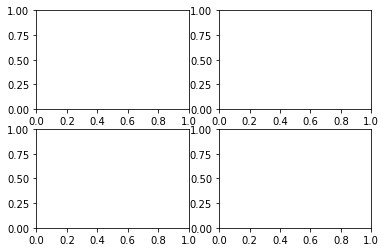

In [2]:
fig, axs = plt.subplots(2, 2)
print(type(fig))
print(type(axs))
print(axs.shape)
print(type(axs[0, 0]))

(3,)
<class 'matplotlib.axes._subplots.AxesSubplot'>


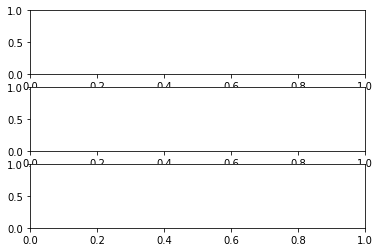

In [3]:
fig, axs = plt.subplots(3, 1)
print(axs.shape)
print(type(axs[1]))

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


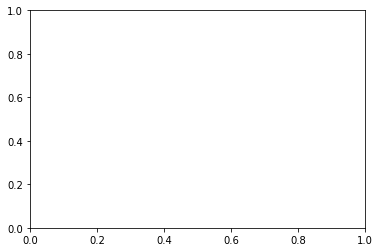

In [4]:
fig, axs = plt.subplots(1, 1)
print(type(fig))
print(type(axs))

## In Class Exercise:
In the cell below, please use `plt.subplots` to create different arrangements of plots

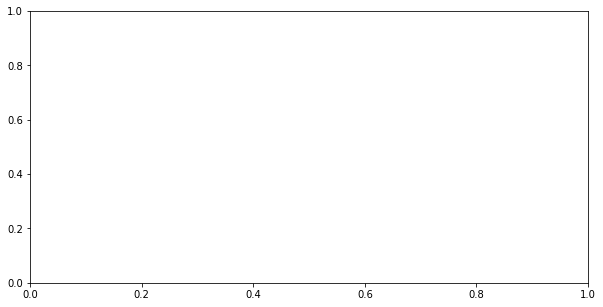

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(10,5))

# Creating a Line Plot (with Pandas)

Let's now look at a typical line plot.  We will use our fuel price data set, that we used in a previous week, for this plot.  First, let's load in the data and take a look at it using `.head()` and `.info()`.

In [7]:
filepath = os.path.join(os.getcwd(), 'data', 'AAA_Fuel_Prices.csv')
fuelPrices = pd.read_csv(filepath, parse_dates=["Month_of_Price"])

In [8]:
fuelPrices.head(10)

,Month_of_Price,County,Fuel,Price,PhysicalUnit
0,2006-01-01,US,Gasoline - Regular,2.314,Dollars
1,2006-01-01,US,Gasoline - Midgrade,2.457,Dollars
2,2006-01-01,US,Gasoline - Premium,2.546,Dollars
3,2006-01-01,US,Diesel,2.568,Dollars
4,2006-01-01,State of Hawaii,Gasoline - Regular,2.800,Dollars
5,2006-01-01,State of Hawaii,Gasoline - Midgrade,2.961,Dollars
6,2006-01-01,State of Hawaii,Gasoline - Premium,3.016,Dollars
7,2006-01-01,State of Hawaii,Diesel,3.271,Dollars
8,2006-01-01,Honolulu,Gasoline - Regular,2.714,Dollars
9,2006-01-01,Honolulu,Gasoline - Midgrade,2.870,Dollars


In [9]:
fuelPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 5 columns):
Month_of_Price    1580 non-null datetime64[ns]
County            1580 non-null object
Fuel              1580 non-null object
Price             1580 non-null float64
PhysicalUnit      1580 non-null object
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 61.8+ KB


### Grab the data for the price for regular grade gasoline in the US. This is the data we will plot.


In [10]:
USRegular = fuelPrices.loc[(fuelPrices['County']=='US') &
                           (fuelPrices['Fuel'] == 'Gasoline - Regular'), :]
USRegular.head()

,Month_of_Price,County,Fuel,Price,PhysicalUnit
0,2006-01-01,US,Gasoline - Regular,2.314,Dollars
20,2006-02-01,US,Gasoline - Regular,2.285,Dollars
40,2006-03-01,US,Gasoline - Regular,2.418,Dollars
60,2006-04-01,US,Gasoline - Regular,2.770,Dollars
80,2006-05-01,US,Gasoline - Regular,2.892,Dollars


## Creating Our Plot with the `.plot()` Method

First, we will create our figure and axes. Then, we will select the column we would like to plot (in this case the 'Price') column and call the `.plot()` method. Also, pass the axes the you just created to the `ax` argument.

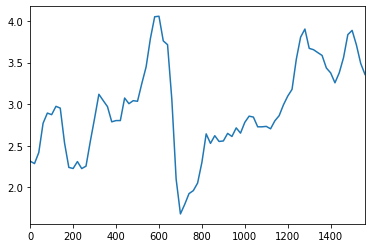

In [11]:
fig, axs = plt.subplots(1, 1)
USRegular['Price'].plot(ax=axs)

## Introducing the `figsize` Argument
The `figsize` argument allows us to change the size of the figure. It is set with a tuple. The first entry controls the height and the second controls the width.

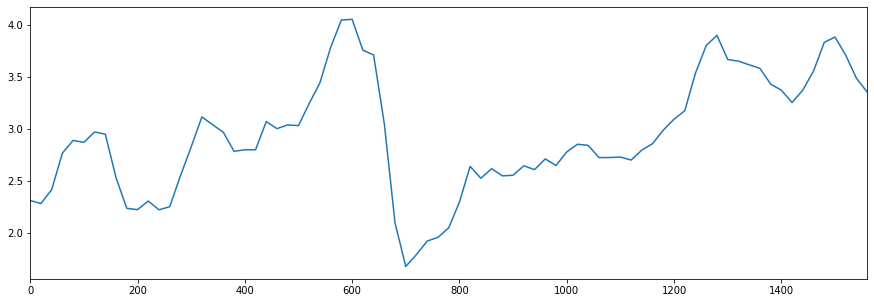

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
USRegular['Price'].plot(ax=axs)

## Introducing the `.set_xlabel()`, `.set_ylabel()`, and `.set_title()` Methods

Text(0.5, 1.0, 'Fuel Price In The US')

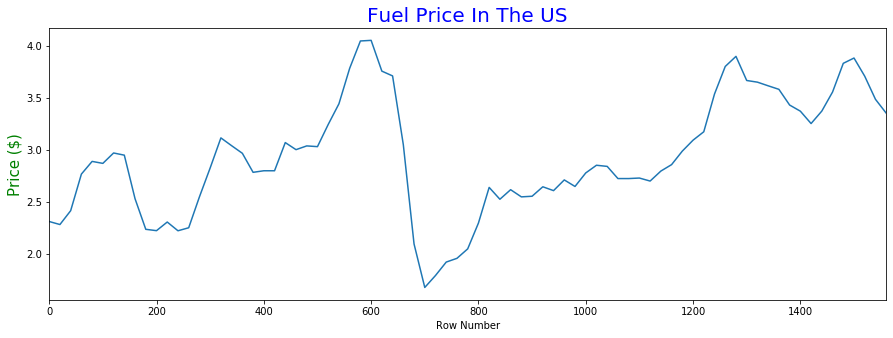

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
USRegular['Price'].plot(ax=axs)
axs.set_xlabel('Row Number')
axs.set_ylabel('Price ($)', color='green', fontsize=15)
axs.set_title('Fuel Price In The US', fontsize=20, color='blue')

# Dealing With DateTime Indices In Plots

## Method 1 - Using Pandas (Not Great)
(unfortunately, pandas does not deal well with datetime formatting)

Text(0, 0.5, 'Price ($)')

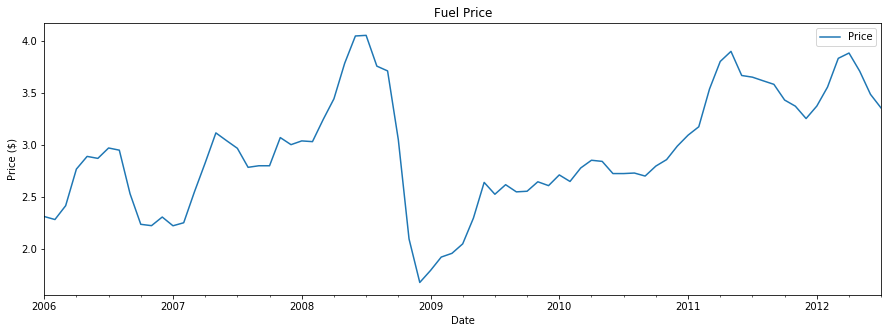

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
USRegular.plot(ax=ax, x='Month_of_Price', y='Price')
ax.set_title('Fuel Price')
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')


## Method 2 - With Matplotlib (Better)

We can use the date locator and formatter function provided by the `date` class in the `matplotlib` package. More documentation can be found here: https://matplotlib.org/api/dates_api.html.

Documentation on the date formatting characters can be found here: https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior

### Example 1: Plotting multiple the fuel price with formatted dates on the x-axis

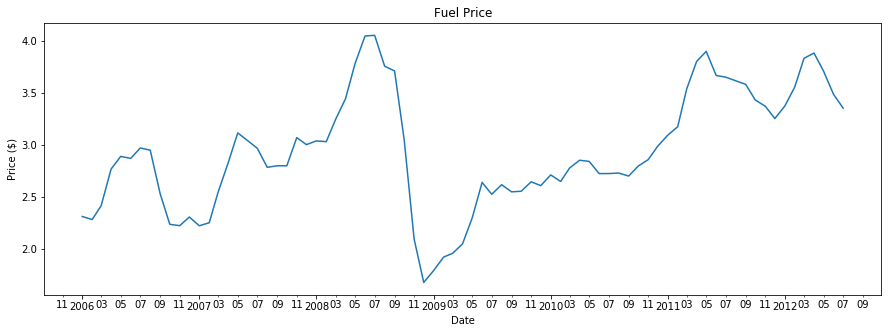

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.set_title('Fuel Price')
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(dates.MonthLocator(interval=2))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%m'))

# We must set the axis options before we plot.
ax.plot(USRegular['Month_of_Price'], USRegular['Price'])



### Example 2: Plotting multiple lines of price data, and using the `label` attribute and the `legend` method

Gasoline - Regular
Gasoline - Midgrade
Gasoline - Premium
Diesel


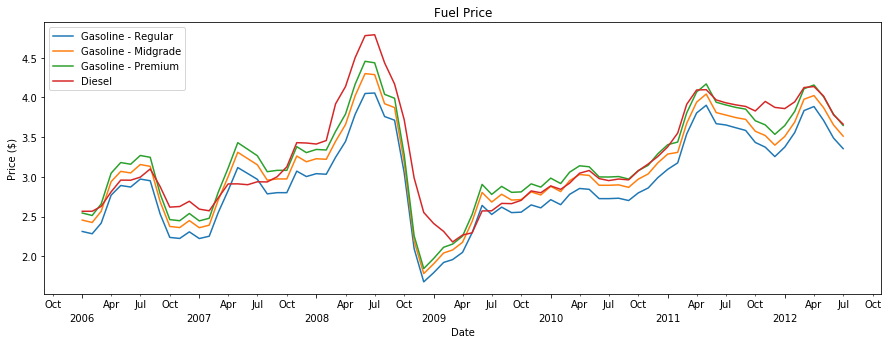

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.set_title('Fuel Price')
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n%Y'))
ax.xaxis.set_minor_locator(dates.MonthLocator(interval=3))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

for fuelType in fuelPrices['Fuel'].unique():
    
    print(fuelType)
    ix = (fuelPrices['Fuel'] == fuelType) & (fuelPrices['County'] == 'US')
    ax.plot(fuelPrices.loc[ix, 'Month_of_Price'], fuelPrices.loc[ix, 'Price'],
            label=fuelType)
    
ax.legend()

## In Class Exercise
Add a cell below and create a plot of fuel prices, add your on labels, title and date formats.

<a name='histograms'></a>
# Plotting Histograms

Note that we use the plot() method again, but this time pass the 'hist' argument to the 'kind' argument.  Valid values of the kind attribute include:
* ‘bar’ or ‘barh’ for bar plots
* ‘hist’ for histogram
* ‘box’ for boxplot
* ‘kde’ or 'density' for density plots
* ‘area’ for area plots
* ‘scatter’ for scatter plots
* ‘hexbin’ for hexagonal bin plots
* ‘pie’ for pie plots

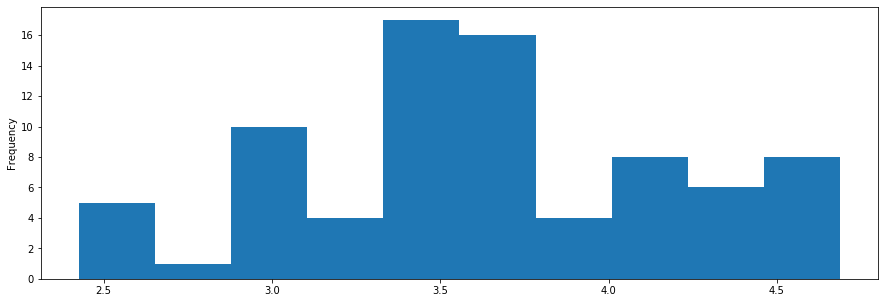

In [20]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
fuelPrices.loc[(fuelPrices['County']=='Honolulu') &
               (fuelPrices['Fuel']=='Gasoline - Premium'), 'Price'].plot(kind='hist', ax=axs)

## Introducing the `bins` argument:

This argument lets us set the number of bins of the histogram. We can also pass a lite of bin boundaries.

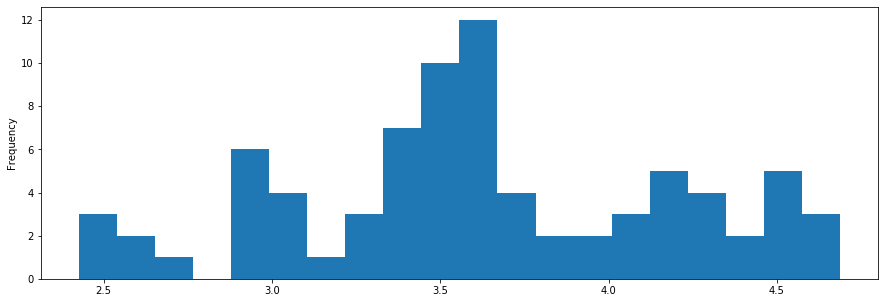

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
fuelPrices.loc[(fuelPrices['County']=='Honolulu') &
               (fuelPrices['Fuel']=='Gasoline - Premium'), 'Price'].plot(kind='hist', bins=20, ax=axs)

## Introducing `alpha` and plotting multiple histograms:

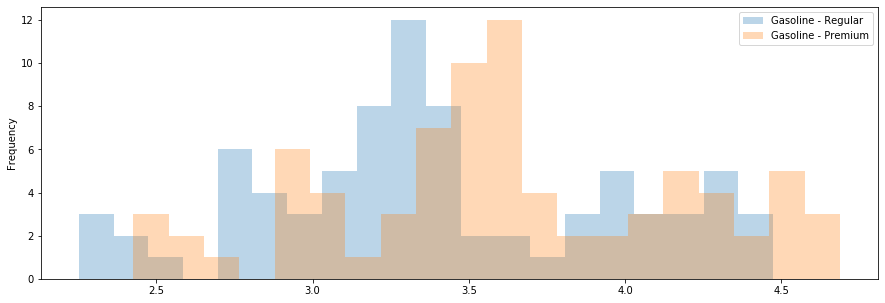

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
for fuelType in ['Gasoline - Regular', 'Gasoline - Premium']:
    fuelPrices.loc[(fuelPrices['County']=='Honolulu') &
                   (fuelPrices['Fuel']==fuelType),
                   'Price'].plot(kind='hist', bins=20, ax=axs, alpha=0.3, label=fuelType)
    axs.legend()

## In Class Exercise
Add a cell below and create a histogram of fuel prices, add your on labels and title.

<a name=barcharts></a>
# Bar Charts

For bar charts, let's use our labor sheet data. First, we load the data:

In [23]:
filepath = os.path.join(os.getcwd(), 'data', 'ShiftManagerApp_LaborSheet.csv')
laborSheetData = pd.read_csv(filepath, parse_dates=[[2, 3], 13])
laborSheetData.head(2)

,Date_Ending_Hour,Store_ID,Manager,Projected_Sales,Sales,DT_TTL,Car_Count,KVS_Total,Scheduled_People,Actual_People,Reason_for_Labor_Diff,Reason_for_High_TTLs,Manager_Entering_Data,Timestamp,OEPE,Park_Percentage
0,2017-01-23 08:00:00,4462,JillianA,540.0,420.0,170.0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,2017-01-23 09:52:14,NaN,NaN
1,2017-02-05 06:00:00,4462,ZoeyD,90.0,155.0,114.0,NaN,78.0,NaN,NaN,NaN,NaN,NaN,2017-02-05 11:30:48,NaN,NaN


## Plotting the Mean Hourly Sales per Store:

Store_ID
4462     621.785758
4587     479.085453
10523    321.783673
11794    400.732671
11969    629.231374
18065    431.919978
31225    170.034831
Name: Sales, dtype: float64


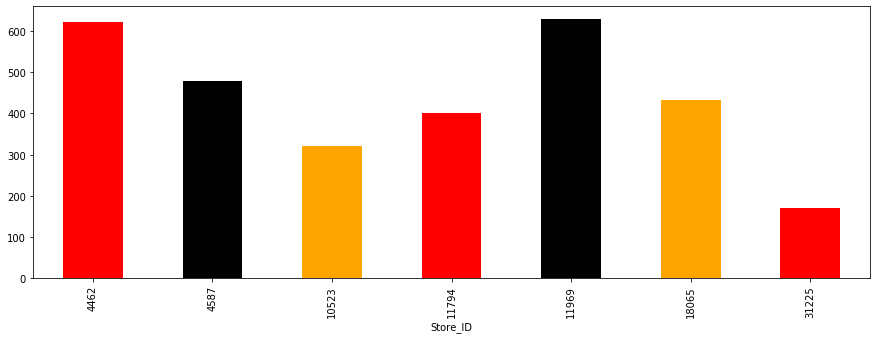

In [27]:
meanHourlySales = laborSheetData.groupby('Store_ID')['Sales'].mean()
print(meanHourlySales)
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
meanHourlySales.plot(kind='bar', ax=axs, color=['red', 'black',  'orange'])

## Create Plots of Sales Per Manager, Per Store:



### First, we need to learn about the zip function.

The `zip` function allows to loop through multiple lists at once.  Let's talk through the two cells below that show examples of this.

In [28]:
zip_output = zip([1, 2, 3], ['a', 'b', 'c'])
list(zip_output)

[(1, 'a'), (2, 'b'), (3, 'c')]

In [29]:
for A, B in zip([1, 2, 3], ['a', 'b', 'c']):
    print(A, B)

1 a
2 b
3 c


### Now we can create our plots:

[[<matplotlib.axes._subplots.AxesSubplot object at 0x111d93e630>


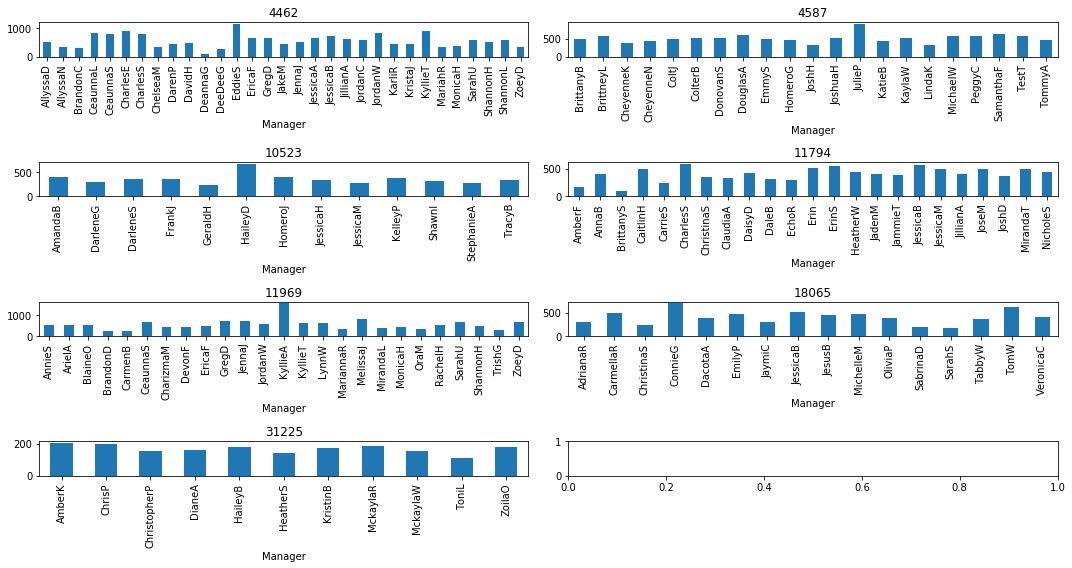

In [35]:
fig, axs = plt.subplots(4, 2, figsize=(15, 8))
print(axs)
print(axs.flatten())

for store, ax in zip(laborSheetData['Store_ID'].unique(), axs.flatten()):
    
    laborSheetData.loc[laborSheetData['Store_ID']==store, :]. \
    groupby('Manager')['Sales'].mean().plot(ax=ax, kind='bar')
    
    ax.set_title(store)

fig.tight_layout()

In [37]:
fig.savefig('/Users/williamhenry/Documents/1_Projects/E-Trade/Course Files/test.png')

## In Class Exercise
Add a cell below and create a bar plot of data from the laborSheetData dataframe

## Question or Comments About This Notebook?
Feel free to contact me via my LinkedIn: https://www.linkedin.com/in/william-j-henry <br>
You can also email me at will@henryanalytics.com <br>